In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data types

In [2]:
# ------------------------------1.Quantitave Data--------------------------
# Describes numeric measurements
Quantitave_Continuous=df["fare"]          # infinite values
Quantitave_Discrete=df["sibsp"]           # finite values

In [3]:
# ------------------------------2.Categorical Data--------------------------
# Categorical data represents categories or labels — not actual numbers.
    # Nominal: Categories with no order (ex:gender) -> "One-Hot Encoding" deal with it perfectly
    # Ordinal: Categories with a logical order (ex:grades) -> use "Label Encoding" or "manual mapping"
Categorical_Nominal = df["sex"]
Categorical_Nominal = df["pclass"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
#search for missing values
df.isnull().sum()               
# deck has so much null -> better drop it
# age is Quantitave Data -> replace nulls with mean
# embark_town is CateCategorical Dara -> replace nulls with mode  

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.fillna({'age': int(df['age'].mean()) ,
           'embark_town': df['embark_town'].mode()[0] ,
           'embarked': df['embarked'].mode()[0]},
            inplace=True)
df.drop(columns=['deck'], inplace=True)

## categorical Analysis

In [7]:
# more visualization in the upcoming visualization course

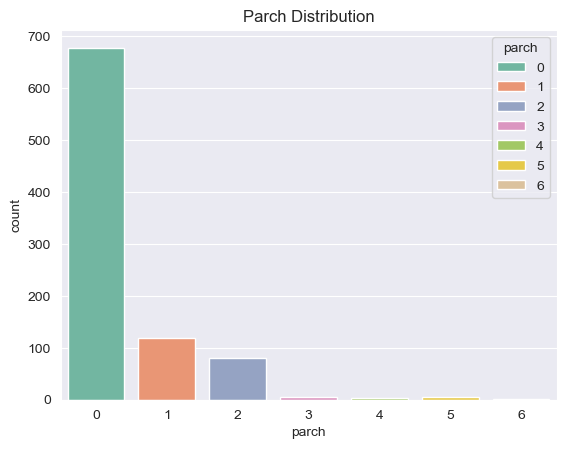

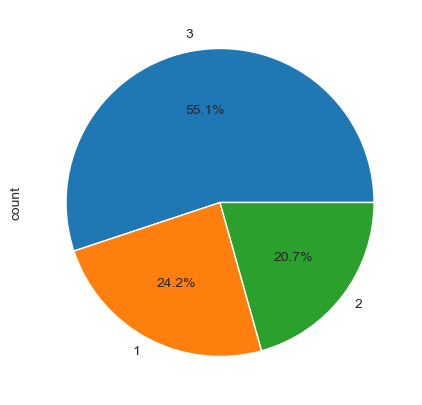

In [8]:
#---------------------------------- 1 -feature count distribution (count plot , Bar plot)---------------------------#
#A-count plot
sns.countplot(x='parch', data=df,palette='Set2',hue='parch')
plt.title("Parch Distribution")
plt.show()
df['parch'].value_counts()        #unbalanced dataset problem 
#B-pie plot
ax = df['pclass'].value_counts().plot.pie(y='class' , figsize=(5,5),autopct='%1.1f%%')

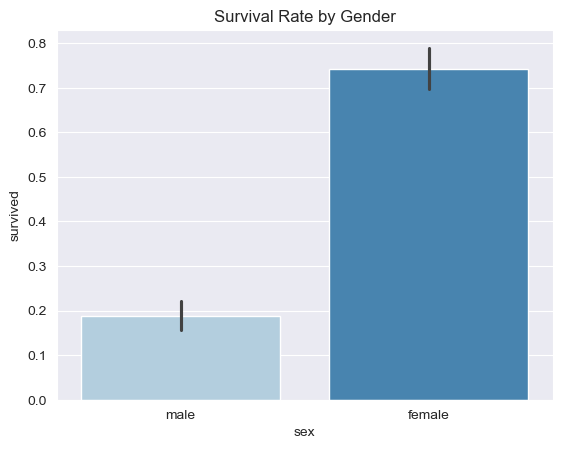

survived     0     1
sex                 
female    0.26  0.74
male      0.81  0.19


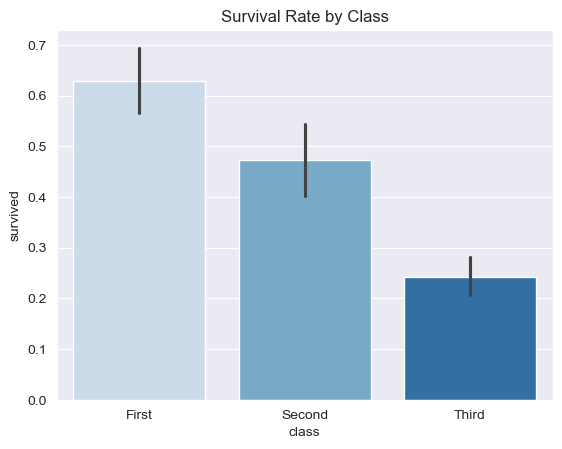

survived     0     1
class               
First     0.37  0.63
Second    0.53  0.47
Third     0.76  0.24


In [9]:
#---------------------------------- 2 -feature VS feature---------------------------#
sns.barplot(x='sex', y='survived', data=df , palette='Blues' , hue='sex')
plt.title("Survival Rate by Gender")
plt.show()
print(pd.crosstab(df['sex'], df['survived'], normalize='index').round(2))
#---
sns.barplot(x='class', y='survived', data=df, palette='Blues',hue='class')
plt.title("Survival Rate by Class")
plt.show()
print(pd.crosstab(df['class'], df['survived'], normalize='index').round(2))


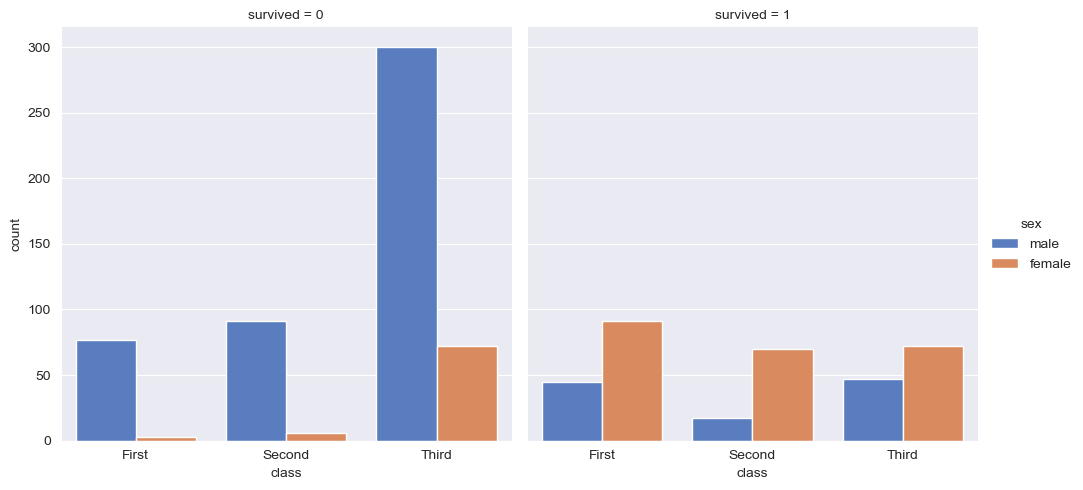

In [10]:
#---------------------------------- 2 -Multiple categorical relationships---------------------------#
sns.catplot(x='class', hue='sex', col='survived', data=df, kind='count', palette='muted')
plt.show()